# Insight_3 Text Classification (Machine Learning)
---

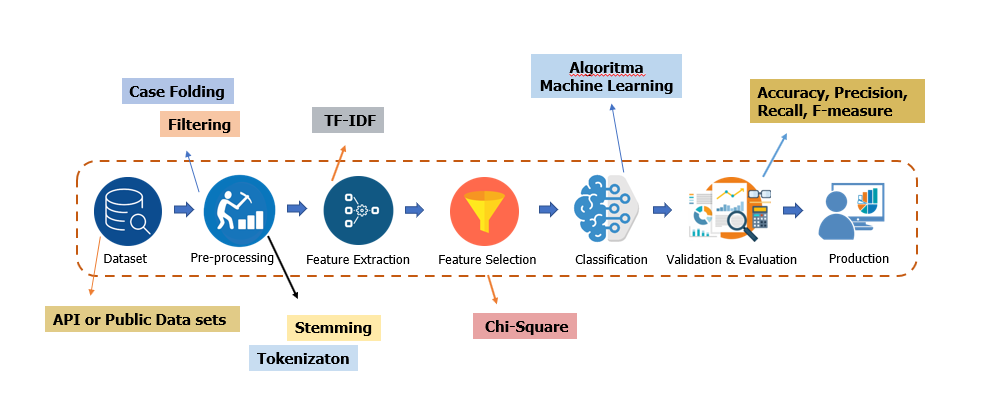

Langkah-langkah penyelesaian meliputi:
1. Data Acquisition
2. Text Pre-processing
   1. Case Folding
   2. Filtering
   3. Stopword
   4. Stemming
3. Feature Engineering
   1. Feature Extraction - BoW & TF IDF
   2. Feature Selection - Chi-Square
4. Modelling (Machine Learning)
5. Model Evaluation
6. Deployment


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle (menyimpan model kita)
import pickle

%matplotlib inline

In [ ]:
# Install library Sastrawi
!pip -q install sastrawi

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 01 Data Acquisition

Penjelasan Label 
* 0: Sentiment Negative
* 1: Sentiment Positif

In [ ]:
# Download dataset
data = pd.read_csv('tweet.csv')
data.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              400 non-null    int64 
 1   Sentiment       400 non-null    object
 2   Acara TV        400 non-null    object
 3   Jumlah Retweet  400 non-null    int64 
 4   Text Tweet      400 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.8+ KB


In [ ]:
print('Total Jumlah SMS:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Negative :', data[data.Sentiment == 'negative'].shape[0], 'data')
print('-- [1] Positive :', data[data.Sentiment == 'positive'].shape[0], 'data')

Total Jumlah SMS: 400 data

terdiri dari (label):
-- [0] Negative : 200 data
-- [1] Positive : 200 data


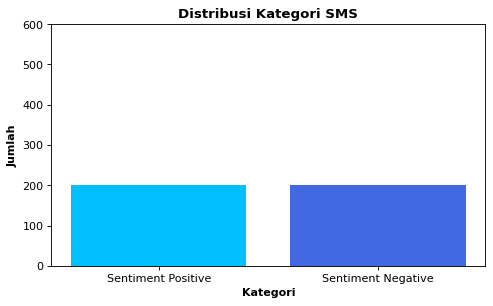

In [ ]:
height = data['Sentiment'].value_counts()
labels = ('Sentiment Positive', 'Sentiment Negative')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Kategori SMS', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

# 02 Text Preprocessing

## Case Folding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [ ]:
raw_sample = data['Text Tweet'].iloc[5]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('\n')
print('Case folding\t: ', case_folding)

Raw data	:  @TRANS7 acara paling komplit dan menarik apalagi ada hitam putih


Case folding	:  trans acara paling komplit dan menarik apalagi ada hitam putih


## Word Normalization

In [ ]:
# Download corpus kumpulan slangwords
# slangword mengubah kata gaul atau kata tidak baku menjadi kata baku
key_norm = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3720, 3)

In [ ]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Filtering (Stopword Removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# stopword (menghapus kata yang tidak penting berdasarkan kamus stopword)
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind[:20]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara']

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['di', 'atau', 'ke', 'per', 'kyk', 'bkin', 'dr', 'nih', 'dpt', 'deh']                    # Tambahkan kata lain dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = data['Text Tweet'].iloc[2]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('\n')
print('Case folding\t\t: ', case_folding)
print('\n')
print('Stopword removal\t: ', stopword_removal)
print('\n')

Raw data		:  Ada nih di trans7 hitam putih, dia dpt penghargaan juga di norwegia #hitamputih


Case folding		:  ada nih di trans hitam putih dia dpt penghargaan juga di norwegia hitamputih


Stopword removal	:  trans hitam putih penghargaan norwegia hitamputih




## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = data['Text Tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('\n')
print('Case folding\t\t: ', case_folding)
print('\n')
print('Stopword removal\t: ', stopword_removal)
print('\n')
print('Stemming\t\t: ', text_stemming)

Raw data		:  @TRANS7 acara paling komplit dan menarik apalagi ada hitam putih


Case folding		:  trans acara paling komplit dan menarik apalagi ada hitam putih


Stopword removal	:  trans acara komplit menarik hitam putih


Stemming		:  trans acara komplit tarik hitam putih


## Text Preprocessing Pipeline (Gabungan Seluruh Text Preprocessing)

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
%%time
data['clean_teks'] = data['Text Tweet'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: total: 2min 9s
Wall time: 2min 19s


In [ ]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
data.to_csv('clean_data.csv')

# 03 Feature Engineering

In [ ]:
# Pisahkan kolom fitur dan target
X = data['clean_teks'] # x yang difokuskan karena x featurenya
y = data['Sentiment']

In [ ]:
X

0      undang n shanijkt hitamputih menang ssk jakart...
1      selamat buka puasa moga amal ibadah ni terima ...
2            trans hitam putih harga norwegia hitamputih
3             selamat ya mas adietaufan masuk hitamputih
4                       asiknya nonton hitam putih trans
                             ...                        
395    banget kesel orang debat pakai emosi matanajwa...
396              orang miskin miskin sekolah pungut liar
397    emosi cepat tua nonton matanajwametrotv lihat ...
398       tampil preman tau kisruh usak matanajwametrotv
399      berbelitbelit putar buang mutu matanajwametrotv
Name: clean_teks, Length: 400, dtype: object

In [ ]:
y

0      positive
1      positive
2      positive
3      positive
4      positive
         ...   
395    negative
396    negative
397    negative
398    negative
399    negative
Name: Sentiment, Length: 400, dtype: object

## Feature Extraction (Bag of Words & N-Gram)
Proses mengubah teks menjadi vektor menggunakan metode BoW

In [ ]:
'''
Convert a collection of text documents to a matrix of token counts.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
'''
from sklearn.feature_extraction.text import CountVectorizer

# BoW - Bigram
# menggunakan sci-kit library
# (1,1) artinya 1 feature 1 kata
bow = CountVectorizer(ngram_range=(1,2))
bow.fit(X)

CountVectorizer(ngram_range=(1, 2))

In [ ]:
# Melihat jumlah fitur
print(len(bow.get_feature_names()))

3408


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(bow.get_feature_names())

['aa', 'aa gym', 'aa gymnastiar', 'aagym', 'aagym partai', 'abang', 'abang acara', 'abas', 'abas anjay', 'abi', 'abi manyu', 'abraham', 'abraham samad', 'abraham slamet', 'academi', 'academi pintar', 'acara', 'acara beda', 'acara botak', 'acara debat', 'acara favorit', 'acara hitam', 'acara hitamputih', 'acara ilc', 'acara inspirasi', 'acara kickandy', 'acara komplit', 'acara live', 'acara malam', 'acara master', 'acara mata', 'acara nazarudin', 'acara nya', 'acara presiden', 'acara sampah', 'acara tai', 'acara televisi', 'acung', 'acung jempol', 'adem', 'adem dengerin', 'adem hati', 'adem indonesialawyersclub', 'adietaufan', 'adietaufan masuk', 'adik', 'adik hitamputihtrans', 'adil', 'adil kickandymetrotv', 'adu', 'adu domba', 'agama', 'agama musnah', 'agama rangkul', 'agama terap', 'agung', 'agung eevnxx', 'agung hapsah', 'agung tuhan', 'agung undang', 'ahmad', 'ahmad dhani', 'ahmaddhaniprast', 'ahmaddhaniprast diketawain', 'ahoax', 'ahoax miris', 'ahok', 'ahok anis', 'ahok cek', 'ah

In [ ]:
# Melihat matriks jumlah fitur
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)
# jadikan array supaya bisa dibaca di data frame


X_bow = bow.transform(X).toarray()
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
data_bow = pd.DataFrame(X_bow, columns=bow.get_feature_names())
data_bow

,aa,aa gym,aa gymnastiar,aagym,aagym partai,abang,abang acara,abas,abas anjay,abi,...,yuk,yuk nonton,yuk tonton,yuk tweeps,yukikatou,yukikatou nongol,zaitun,zaitun rasmin,zhonk,zhonk kickandymetrotv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
with open('bow_feature.pickle', 'wb') as output:
  pickle.dump(X_bow, output)

## Feature Extraction (TF-IDF & N-Gram)
Proses mengubah teks menjadi vector menggunakan metode TF-IDF

In [ ]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,2))
tf_idf.fit(X)

TfidfVectorizer(ngram_range=(1, 2))

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names()))

3408


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names())

['aa', 'aa gym', 'aa gymnastiar', 'aagym', 'aagym partai', 'abang', 'abang acara', 'abas', 'abas anjay', 'abi', 'abi manyu', 'abraham', 'abraham samad', 'abraham slamet', 'academi', 'academi pintar', 'acara', 'acara beda', 'acara botak', 'acara debat', 'acara favorit', 'acara hitam', 'acara hitamputih', 'acara ilc', 'acara inspirasi', 'acara kickandy', 'acara komplit', 'acara live', 'acara malam', 'acara master', 'acara mata', 'acara nazarudin', 'acara nya', 'acara presiden', 'acara sampah', 'acara tai', 'acara televisi', 'acung', 'acung jempol', 'adem', 'adem dengerin', 'adem hati', 'adem indonesialawyersclub', 'adietaufan', 'adietaufan masuk', 'adik', 'adik hitamputihtrans', 'adil', 'adil kickandymetrotv', 'adu', 'adu domba', 'agama', 'agama musnah', 'agama rangkul', 'agama terap', 'agung', 'agung eevnxx', 'agung hapsah', 'agung tuhan', 'agung undang', 'ahmad', 'ahmad dhani', 'ahmaddhaniprast', 'ahmaddhaniprast diketawain', 'ahoax', 'ahoax miris', 'ahok', 'ahok anis', 'ahok cek', 'ah

In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)
# X_tf_idf adalah data featurenya

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names())
data_tf_idf

,aa,aa gym,aa gymnastiar,aagym,aagym partai,abang,abang acara,abas,abas anjay,abi,...,yuk,yuk nonton,yuk tonton,yuk tweeps,yukikatou,yukikatou nongol,zaitun,zaitun rasmin,zhonk,zhonk kickandymetrotv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# data teks yang sudah berubah menjadi vektor akan disimpan pada file pickle
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

## Feature Selection (Chi Square)

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=380)  # mengambil 1000 feature yang paling bagus
X_kbest_features = chi2_features.fit_transform(X, y) # 1000 feature (x) yang terpilih akan masuk pada variabel ini
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 3408
Reduced feature number: 380


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['score'])
data_chi2

,score
0,0.793109
1,0.521906
2,0.333342
3,0.244436
4,0.244436
...,...
3403,0.330585
3404,0.324672
3405,0.324672
3406,0.229672


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names()
data_chi2['feature'] = feature
data_chi2

,score,feature
0,0.793109,aa
1,0.521906,aa gym
2,0.333342,aa gymnastiar
3,0.244436,aagym
4,0.244436,aagym partai
...,...,...
3403,0.330585,yukikatou nongol
3404,0.324672,zaitun
3405,0.324672,zaitun rasmin
3406,0.229672,zhonk


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='score', ascending=False)

,score,feature
1480,5.627408e+00,keren
1066,5.283825e+00,hitamputiht
1205,4.253335e+00,inspirasi
1556,3.933190e+00,kickandymetrotv
1057,3.539566e+00,hitam putih
...,...,...
539,8.698634e-05,botak
2414,1.409085e-05,pihak
1389,1.268364e-05,kandang
2858,6.887770e-06,si


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
# datanya diambil dari corpus chi2
# setelah itu baru dikombinasikan dengan feature data kita
mask = chi2_features.get_support()
mask

array([ True,  True, False, ..., False, False, False])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['aa',
 'aa gym',
 'acara',
 'acara hitam',
 'acara inspirasi',
 'acara televisi',
 'adem',
 'adu',
 'agung',
 'agung undang',
 'ajang',
 'ajar gusdur',
 'ala',
 'allah',
 'anak',
 'anak imajinasi',
 'anak nya',
 'aneh',
 'angkat',
 'angket',
 'angket ilc',
 'anies',
 'anis fitnah',
 'apa',
 'apartemen',
 'apartemen kickandy',
 'asal',
 'asik',
 'asik hitam',
 'bacot',
 'bacot jaga',
 'bagus',
 'bahagia',
 'baik',
 'banget',
 'banget acara',
 'bangga',
 'bangkrut',
 'basuki',
 'baswedan',
 'batal',
 'bawa',
 'bayar',
 'beda kelas',
 'benar mata',
 'benci',
 'berani',
 'berani kickandy',
 'bersih',
 'besok',
 'bicara',
 'bicara ribet',
 'bidik',
 'bijaksana',
 'bilang',
 'bocor',
 'bodoh',
 'bodoh orang',
 'bohong',
 'bohong diulangulang',
 'boys',
 'bro',
 'bro hitamputihtrans',
 'bu',
 'buka',
 'buruk',
 'butuh',
 'buya syafii',
 'cabik',
 'cepat',
 'cerdas',
 'cerita jalan',
 'cinta',
 'coba',
 'dahlan',
 'daki',
 'daki gunung',
 'damai',
 'damai senandung',
 'dapat',
 'demo',
 'didi

In [ ]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [ ]:
kbest_feature

{'hitamputih': 1058,
 'menang': 1898,
 'selamat': 2775,
 'buka': 562,
 'moga': 1982,
 'terima': 3104,
 'allah': 133,
 'trans': 3177,
 'hitam': 1054,
 'putih': 2514,
 'trans hitam': 3182,
 'hitam putih': 1057,
 'mas': 1826,
 'putih trans': 2534,
 'acara': 16,
 'inspiratif': 1217,
 'banget': 315,
 'putih inspiratif': 2524,
 'inspiratif banget': 1218,
 'suka': 2948,
 'suka banget': 2950,
 'banget acara': 316,
 'acara hitam': 21,
 'keren': 1480,
 'bro': 550,
 'hitamputihtrans': 1082,
 'keren bro': 1485,
 'bro hitamputihtrans': 551,
 'lihat': 1692,
 'ganteng': 899,
 'cinta': 640,
 'kasih': 1414,
 'terima kasih': 3107,
 'lancar': 1646,
 'moga lancar': 1987,
 'lancar hitamputihtrans': 1647,
 'baik': 299,
 'putih baik': 2517,
 'bagus': 283,
 'pintar': 2438,
 'hibur': 1040,
 'ustadz': 3335,
 'trans hitamputih': 3183,
 'tamu': 3013,
 'asal': 247,
 'kangen': 1392,
 'tayang': 3042,
 'terimakasih': 3108,
 'malam': 1761,
 'inspirasi': 1205,
 'putih malam': 2527,
 'moga inspirasi': 1985,
 'seru': 283

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aa,aa gym,acara,acara hitam,acara inspirasi,acara televisi,adem,adu,agung,agung undang,...,urus,urus miskin,usak,ustadz,veteran,veteran koruptor,wawas,wibawa,yag,yuk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.276837,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

# 04 Modelling (Machine Learning)

In [ ]:
'''
Supervised learning in Sklearn
https://scikit-learn.org/stable/supervised_learning.html
'''
from sklearn.naive_bayes import MultinomialNB           # Pilih salah satu algoritma supervised learning. Contoh ini menggunakan algoritma Naive Bayes
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih
from sklearn import svm

In [ ]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur

# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=40)

In [ ]:
# Training the model
algorithm = svm.SVC()               # Load algoritma pembelajaran
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih 

# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [ ]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array(['positive', 'negative', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'negative', 'negative', 'positive', 'negative', 'negati

In [ ]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

array(['positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'positive', 'negative', 'negati

# 05 Model Evaluation

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 68
Jumlah prediksi salah	: 12
Akurasi pengujian	: 85.0 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[39  4]
 [ 8 29]]


In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

    negative       0.83      0.91      0.87        43
    positive       0.88      0.78      0.83        37

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



In [ ]:
# Cross Validation

from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.8    0.8875 0.875  0.8875 0.85   0.875  0.9125 0.9375 0.825  0.9125] 

Rata-rata akurasi pada cross validation: 0.8762500000000001
